In [13]:
!pip install nltk

In [14]:
import nltk
print(nltk.__version__)

3.6.2


In [15]:
# nltk의 모델 다운(spacy의 "en_core_web_md"처럼 여러가지 선택)
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
# 'stopword(불용어)' download
# 위치 C:\Users\SONG\AppData\Roaming\nltk_data

In [17]:
import nltk
from nltk.corpus import twitter_samples as ts

In [18]:
ts.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [19]:
sample_tw = ts.strings("tweets.20150430-223406.json")
type(sample_tw), len(sample_tw)

(list, 20000)

In [20]:
sample_tw[20]

"@B0MBSKARE the anti-Scottish feeling is largely a product of Tory press scaremongering. In practice most people won't give a toss!"

In [25]:
pos_tw = ts.strings("positive_tweets.json")
print(type(pos_tw), len(pos_tw))
print(pos_tw[20])
print(wtoken(pos_tw[20]))

<class 'list'> 5000
#FollowFriday @MBandScott_ @Eric_FLE @pointsolutions3 for being top new followers in my community this week :)
['#', 'FollowFriday', '@', 'MBandScott_', '@', 'Eric_FLE', '@', 'pointsolutions3', 'for', 'being', 'top', 'new', 'followers', 'in', 'my', 'community', 'this', 'week', ':', ')']


In [23]:
from nltk.tokenize import word_tokenize as wtoken

In [32]:
print(len(wtoken(sample_tw[20])))
print(wtoken(sample_tw[20]))

24
['@', 'B0MBSKARE', 'the', 'anti-Scottish', 'feeling', 'is', 'largely', 'a', 'product', 'of', 'Tory', 'press', 'scaremongering', '.', 'In', 'practice', 'most', 'people', 'wo', "n't", 'give', 'a', 'toss', '!']


In [30]:
from nltk.tokenize import wordpunct_tokenize
print(len(wordpunct_tokenize(sample_tw[20])))
print(wordpunct_tokenize(sample_tw[20]))

27
['@', 'B0MBSKARE', 'the', 'anti', '-', 'Scottish', 'feeling', 'is', 'largely', 'a', 'product', 'of', 'Tory', 'press', 'scaremongering', '.', 'In', 'practice', 'most', 'people', 'won', "'", 't', 'give', 'a', 'toss', '!']


In [34]:
from nltk.tokenize import regexp_tokenize
pattern = "\w+"
print(len(regexp_tokenize(sample_tw[20], pattern)))
print(regexp_tokenize(sample_tw[20], pattern))

22
['B0MBSKARE', 'the', 'anti', 'Scottish', 'feeling', 'is', 'largely', 'a', 'product', 'of', 'Tory', 'press', 'scaremongering', 'In', 'practice', 'most', 'people', 'won', 't', 'give', 'a', 'toss']


In [36]:
from nltk.tokenize import regexp_tokenize
pattern = "\w+|[@!'-]"
print(len(regexp_tokenize(sample_tw[20], pattern)))
print(regexp_tokenize(sample_tw[20], pattern))

26
['@', 'B0MBSKARE', 'the', 'anti', '-', 'Scottish', 'feeling', 'is', 'largely', 'a', 'product', 'of', 'Tory', 'press', 'scaremongering', 'In', 'practice', 'most', 'people', 'won', "'", 't', 'give', 'a', 'toss', '!']


In [37]:
import nltk
from nltk.stem import PorterStemmer

stemming = PorterStemmer()

In [38]:
stemming.stem("enjoying"), stemming.stem("enjoys"), stemming.stem("enjoyable")

('enjoy', 'enjoy', 'enjoy')

In [40]:
stemming.stem("variation"), stemming.stem("variate")

('variat', 'variat')

In [42]:
stemming.stem("taking"), stemming.stem("taken") # 잘 안되는..

('take', 'taken')

In [52]:
print(stemming.stem("flyable"), stemming.stem("flying"))
print(stemming.stem("cooking"), stemming.stem("cookery"))

flyabl fli
cook cookeri


In [48]:
#  잘 안되는 건 규칙을 만들 수도 있어.
from nltk.stem import RegexpStemmer
regexp_stemmer = RegexpStemmer("able$|ing$", min=4)
regexp_stemmer.stem("flyable"), regexp_stemmer.stem("flying")

('fly', 'fly')

In [49]:
from nltk.stem import RegexpStemmer
regexp_stemmer = RegexpStemmer("able$|ing$")
regexp_stemmer.stem("flying"), regexp_stemmer.stem("flying")

('fly', 'fly')

In [53]:
from nltk.stem import LancasterStemmer
lancater_stemmer = LancasterStemmer()
lancater_stemmer.stem("cooking"), lancater_stemmer.stem("cookery")

('cook', 'cookery')

In [54]:
from nltk.stem import snowball
snowball_stemmer = snowball.SnowballStemmer("spanish")
snowball_stemmer.stem("variation"), snowball_stemmer.stem("variate")

('variation', 'variat')

In [56]:
from nltk.corpus import stopwords
sw_1 = stopwords.words("english")
type(sw_1), len(sw_1)

(list, 179)

In [58]:
print(sw_1[20:41])

['himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that']


In [65]:
example_text = "This is an example sentece to test stopwords"
example_text_without_stopwords =[
    word for word in example_text.split() if word.lower() not in sw_1
]

In [66]:
example_text_without_stopwords

['example', 'sentece', 'test', 'stopwords']

In [71]:
from nltk.corpus import gutenberg
words_in_hamlet = gutenberg.words("shakespeare-hamlet.txt")
type(words_in_hamlet), len(words_in_hamlet)

(nltk.corpus.reader.util.StreamBackedCorpusView, 37360)

In [70]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [72]:
words_in_hamle_without_stopwords=[
    word for word in words_in_hamlet if word not in sw_1
]


type(words_in_hamle_without_stopwords), len(words_in_hamle_without_stopwords)

(list, 25876)

In [73]:
words_in_hamle_with_stopwords=[
    word for word in words_in_hamlet if word in sw_1
]
len(words_in_hamle_with_stopwords)

11484

In [74]:
25876+11484

37360

In [75]:
(len(words_in_hamle_without_stopwords) / len(words_in_hamlet)) * 100

69.26124197002142

In [76]:
import nltk 
from nltk.corpus import webtext
webtext.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']

In [77]:
webtext_sentences = webtext.sents("firefox.txt")
type(webtext_sentences), len(webtext_sentences)

(nltk.corpus.reader.util.StreamBackedCorpusView, 1142)

In [78]:
webtext_words= webtext.words("firefox.txt")
type(webtext_words), len(webtext_words)

(nltk.corpus.reader.util.StreamBackedCorpusView, 102457)

In [79]:
vocabulary = set(webtext_words)
type(vocabulary), len(vocabulary)

(set, 8296)

In [80]:
frequency_dist = nltk.FreqDist(webtext_words)
type(frequency_dist), len(frequency_dist)

(nltk.probability.FreqDist, 8296)

In [82]:
frequency_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [89]:
print(sorted(frequency_dist, key = frequency_dist.__getitem__, reverse=True)[:30])
print(type(sorted(frequency_dist, key = frequency_dist.__getitem__, reverse=True)))
print(len(sorted(frequency_dist, key = frequency_dist.__getitem__, reverse=True)))

['.', 'in', 'to', '"', 'the', "'", 'not', '-', 'when', 'on', 'a', 'is', 't', 'and', 'of', '(', 'page', 'for', 'with', ')', 'window', 'Firefox', 'does', 'from', 'open', ':', 'menu', 'should', 'bar', 'tab']
<class 'list'>
8296


In [94]:
large_words = dict([
    (k, v) for k, v in frequency_dist.items() if len(k) >3
])

print(len(large_words), type(large_words), "\n", large_words)

7175 <class 'dict'> 
 {'Cookie': 22, 'Manager': 179, 'allow': 53, 'sites': 63, 'that': 145, 'removed': 21, 'cookies': 57, 'future': 4, 'should': 461, 'stay': 21, 'checked': 22, 'When': 132, 'full': 38, 'screen': 101, 'mode': 51, 'Pressing': 9, 'Ctrl': 96, 'open': 479, 'browser': 392, 'when': 1255, 'only': 139, 'download': 297, 'dialog': 330, 'left': 75, 'icons': 106, 'context': 104, 'menu': 462, 'called': 16, 'made': 16, 'proper': 6, 'toolbar': 364, 'given': 15, 'ability': 25, 'collapse': 15, 'expand': 29, 'Implement': 25, 'Cocoa': 1, 'style': 40, 'customization': 16, 'ifdefs': 3, 'MOZ_PHOENIX': 4, 'customize': 39, 'small': 45, 'nightly': 28, 'builds': 45, 'tinderboxen': 1, 'Phoenix': 186, 'finish': 7, 'tearing': 1, 'prefs': 33, 'pieces': 1, 'then': 40, 'make': 47, 'suck': 3, 'mozbrowser': 2, 'script': 21, 'doesn': 453, 'start': 124, 'correct': 17, 'binary': 8, 'Need': 47, 'bookmark': 329, 'groups': 11, 'icon': 180, 'Dropping': 2, 'palette': 4, 'horks': 3, 'things': 6, 'keyboard': 65, 

In [95]:
frequency_dist = nltk.FreqDist(large_words)
print(sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)[:30])

['when', 'page', 'with', 'window', 'Firefox', 'does', 'from', 'open', 'menu', 'should', 'doesn', 'after', 'Firebird', 'work', 'browser', 'toolbar', 'button', 'bookmarks', 'dialog', 'bookmark', 'file', 'download', 'crashes', 'text', 'crash', 'click', 'tabs', 'Bookmarks', 'link', 'firefox']


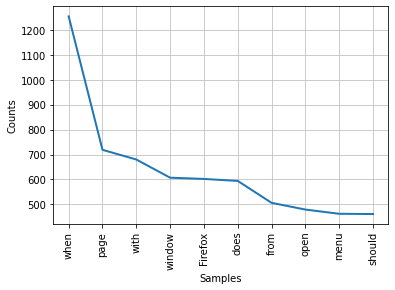

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [99]:
frequency_dist.plot(10, cumulative=False)  # cumulative = 누적되는

In [103]:
!pip install wordcloud 


  Using cached wordcloud-1.8.1-cp39-cp39-win_amd64.whl


In [104]:
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

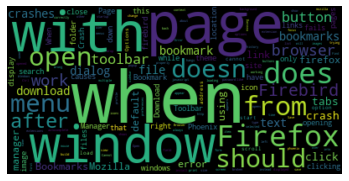

In [106]:
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [117]:
# 불용어 제거
from nltk.corpus import stopwords
sw_1 = stopwords.words("english")
webtext_words_without_sw = [word for word in webtext_words if word not in sw_1 and len(word) >3]

In [118]:
print("from" in webtext_words_without_sw)
print("when" in webtext_words_without_sw)

False
False


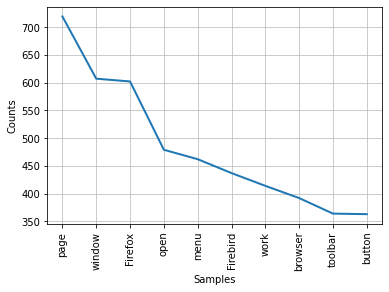

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [119]:
frequency_dist = nltk.FreqDist(webtext_words_without_sw)

frequency_dist.plot(10)


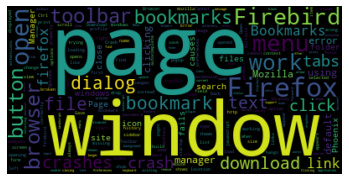

In [120]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()